In [203]:
####import neccessary modules######
import csv #import csv so i could csvreader but i didnt actually use this
import pandas as pd # pandas to convert my csv to a dataframe
from sklearn.preprocessing import StandardScaler #for normalisation
import numpy as np 
from sklearn.decomposition import PCA # for PCA
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.manifold import TSNE
import mpl_toolkits.mplot3d
import seaborn as sns

Great! trying this out!


(1408, 19144)
2.6292298248964525 2.5159338324243987


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.83591028 0.02003197]


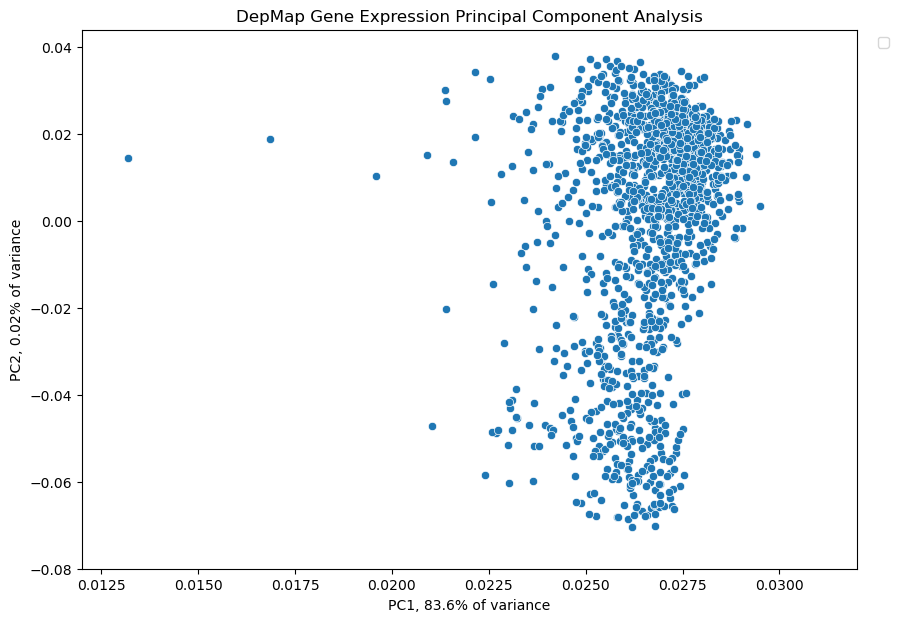

In [204]:
#####read in gene expression csv as a dataframe, index so it reads in row names
expression = pd.read_csv('/home/alanah/Downloads/Expression_Public_22Q4.csv', index_col=0) 

#######extracting the column names and extracting rwo names
column_names = list(expression.columns.values) 
row_names = list(expression.index.values) 

####index all the values from the expression datafram, not sure if this is useful
x = expression.iloc[:, ].values 

##### normalizing the features
#x = StandardScaler().fit_transform(x) 

#####whats the dimensions of the data, check mean and stadard deviation of normalised data
print(x.shape) 
print(np.mean(x),np.std(x)) 

######make a PCA q with 2 principal components 
pca_expression = PCA(n_components=2) 
pca_expression.fit_transform(np.transpose(x))

#### look at how much variance is explained by the PCs
print(pca_expression.explained_variance_ratio_)

######plot the PCA as a scatter plot with a component on eah axis , [0, : ] -> the fir
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_expression.components_[0,:], y=pca_expression.components_[1,:])

plt.title('DepMap Gene Expression Principal Component Analysis')

plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.32964281 0.08744874]


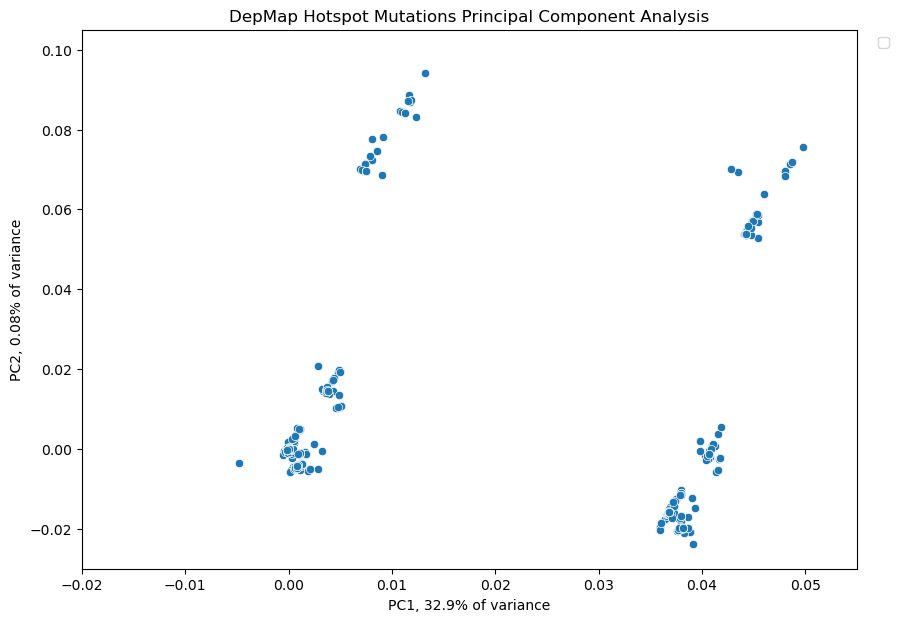

In [205]:
######read in gene expression csv as a dataframe, index so it reads in row names
mutation = pd.read_csv('/home/alanah/Downloads/Hotspot_Mutations.csv', index_col=0) 
mutation = mutation.replace(2,1)

####extracting the column names and extracting row names
column_names = list(mutation.columns.values) 
row_names_mut = list(mutation.index.values) 

##### index all the values from the expression datafram, not sure if this is useful
x_mut = mutation.iloc[:, ].values 
print(x_mut)
#x_mut = StandardScaler().fit_transform(x_mut) 

###### normalizing the features
#x_mut = StandardScaler().fit_transform(x_mut) 

####whats the dimensions of the data, check mean and stadard deviation of normalised data
#print(x.shape) 
#print(np.mean(x),np.std(x)) 
#print(type(x))

#### make a PCA q with 2 principal components 
pca_mutation = PCA(n_components=2) 
pca_mutation.fit_transform(np.transpose(x_mut))
print(pca_mutation.explained_variance_ratio_)

###### plot the PCA as a scatter plot with a component on eah axis
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_mutation.components_[0,:], y=pca_mutation.components_[1,:])

plt.title('DepMap Hotspot Mutations Principal Component Analysis')

plt.xlabel('PC1, 32.9% of variance')
plt.ylabel('PC2, 0.08% of variance')
plt.ylim(-0.03, 0.105)
plt.xlim(-0.02, 0.055)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 




668
390
['NRAS', 'BRAF', 'PIK3CA', 'KRAS', 'TP53']
667


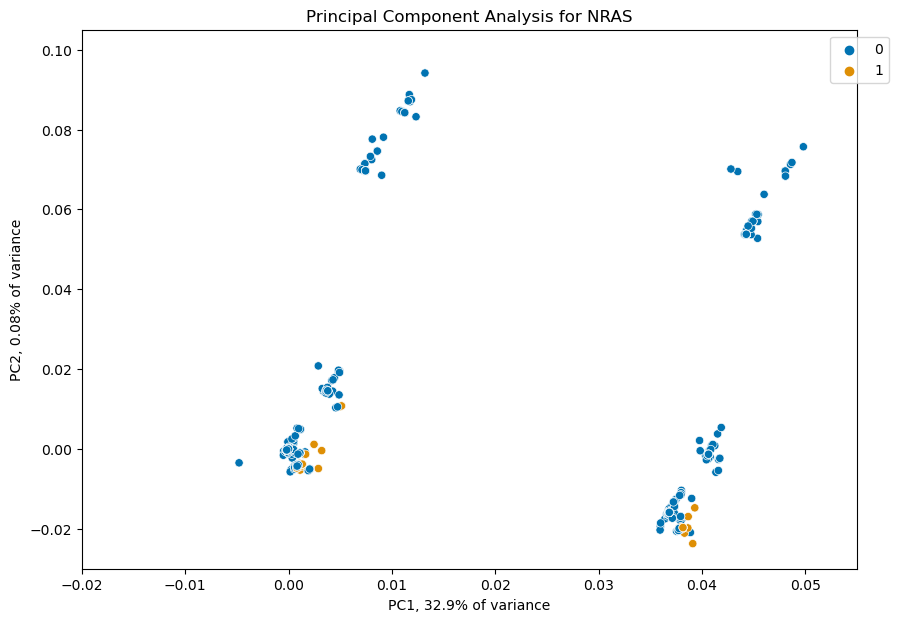

In [206]:
##### sum up the amount of mutations per gene
sum_genes = np.sum(x_mut, axis = 0)

#####sort the amount of mutations per gene in descending order
sorted = np.sort(sum_genes)
print(max(sum_genes))
top_genes = np.argsort(sum_genes ,axis=0)


#####get the indexes of the top five most mutated genes in one list together and individually
top_five = top_genes[-5:, ]
gene_one = (top_genes[-1,])
gene_two = (top_genes[-2,])
gene_three = (top_genes[-3,])
gene_four = (top_genes[-4,])
gene_five = (top_genes[-5,])
print(gene_one)
####### find the names of the most mutated genes
top_five_names = list()
for i in top_five:
    top_five_names.append(mutation.columns[i])

print(top_five_names)
#print(mutation.columns[gene_five])
print(np.count_nonzero(np.where(x_mut[:,gene_one]==1)))

######do the PCA
##sum up the number of times no mutation is found for the top mutated gene
# plt.scatter(pca_mutation.components_[0,np.where(x_mut[:,gene_one]==0)] ,pca_mutation.components_[1,np.where(x_mut[:,gene_one]==0)]) 

# # sum the number of times adamaging mutation is found in the top gene for all cell lines 
# plt.scatter(pca_mutation.components_[0,np.where(x_mut[:,gene_one]==1)],pca_mutation.components_[1,np.where(x_mut[:,gene_one]==1)])

plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_mutation.components_[0,:], y=pca_mutation.components_[1,:], hue=mutation.NRAS, palette=('colorblind'))

plt.title('Principal Component Analysis for NRAS')

plt.xlabel('PC1, 32.9% of variance')
plt.ylabel('PC2, 0.08% of variance')
plt.ylim(-0.03, 0.105)
plt.xlim(-0.02, 0.055)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 

In [207]:
###### find the lengths of the rows of the expression and mutation dataset
print(len(row_names))
print(len(row_names_mut))


#### create a for loop to get the overlap between the two lists
overlap_exp  = list()
overlap_mut = list()
for i in range(len(row_names)):     # for each variable in the range of the full length of the row_names list
    if row_names_mut.count(row_names[i])>0: # if the row name in row_names is counted at least once
        overlap_exp.append(i) # append that row_name index to the overlap_exp list
        overlap_mut.append(row_names_mut.index(row_names[i])) # append the index where the row name from row_names appears in row_names_mut


####### find the length of overlap_exp and overlap_mut, chek they are the same
print(len(overlap_exp))  
print(len(overlap_mut))
len(overlap_exp) == len(overlap_mut)

######### create new dataframesw containing from the main ones, containing only the rows that match those from the overlap lists. .iloc: matching indices to indices as the overlap lists contain the row numbers (the indices) ########

joinable_exp = expression.iloc[overlap_exp]  
print(len(joinable_exp))

joinable_mut = mutation.iloc[overlap_mut]
print(len(joinable_mut))


#### sort the joinable datasets to be inascending order so now they not only contain the same row names but in the same order.
joinable_exp = joinable_exp.sort_index(ascending=True)
joinable_mut = joinable_mut.sort_index(ascending=True)


1408
1701
1359
1359
1359
1359


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.32493527 0.09557958]
[0.83612127 0.02009768]
8007


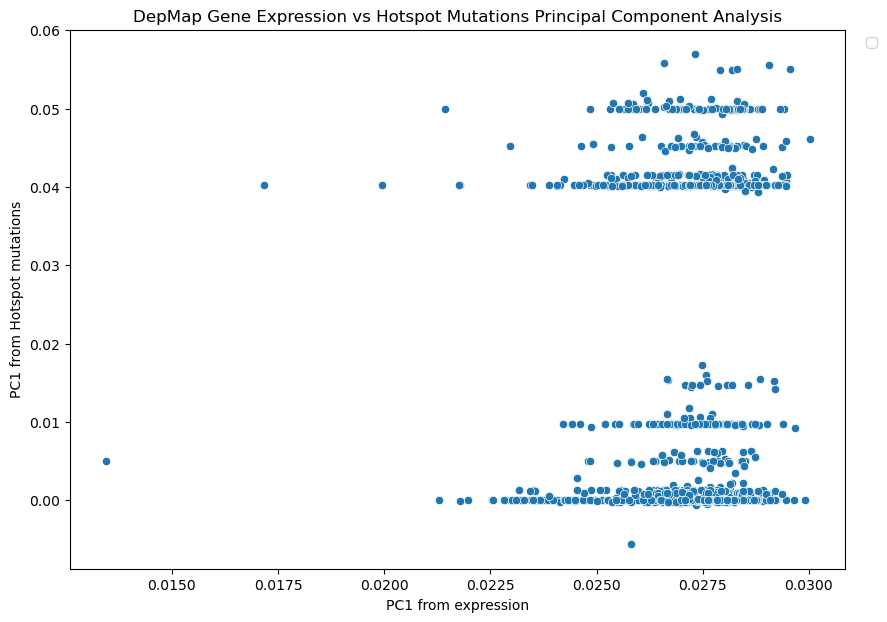

In [208]:
##### index all the values from the datafram, make PCA with 2 components, transform and transpose the data for bothe the datasets
join_exp = joinable_exp.iloc[:, ].values
#join_exp = StandardScaler().fit_transform(join_exp) 
pca_joinexp =PCA(n_components=2)
pca_joinexp.fit_transform(np.transpose(join_exp))

join_mut = joinable_mut.iloc[:, ].values
#join_mut = StandardScaler().fit_transform(join_mut) 
pca_joinmut =PCA(n_components=2)
pca_joinmut.fit_transform(np.transpose(join_mut))


##### find the variance explained by them
print(pca_joinmut.explained_variance_ratio_)
print(pca_joinexp.explained_variance_ratio_)

##### find the index of a specfic gene
print(joinable_exp.columns.get_loc('TP53'))

##### plot the PCA as a scatter plot with a the PC! from the mutation dataset and PC1 from the expression datasetc
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinmut.components_[0,:])

plt.title('DepMap Gene Expression vs Hotspot Mutations Principal Component Analysis')

plt.xlabel('PC1 from expression')
plt.ylabel('PC1 from Hotspot mutations')
#plt.ylim(-0.08, 0.044)
#plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 

186
1222


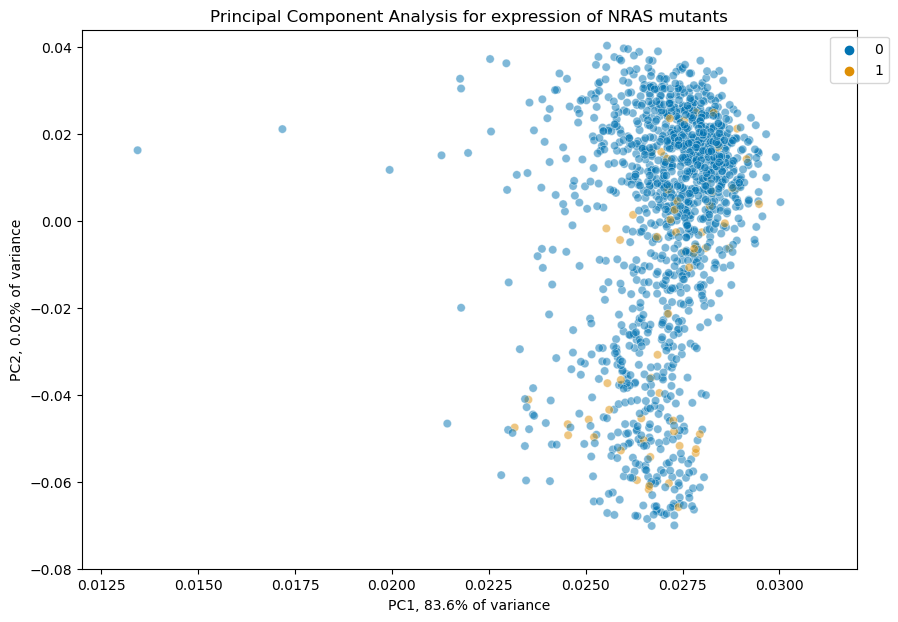

In [212]:
###### indexing all the columns where gene one has a damaging mutation (row indexes)
mut_gene_one =np.where(x_mut[:,gene_two]==1)

#####  getting all the cell lines names ie the row names for the cell lines with a damaging mutation in gene one
cell_lines = list(mutation.index[mut_gene_one])


###### for loop to get the row indexes where 
mut_celllines = list() #list of cellines (rows) where the damaging mutation appear
no_mut_celllines = list() #list of cell lines (rows) where no mutation occurs
for i in range(len(row_names)):     # for each variable in the range of the full length of the row_names list
    if cell_lines.count(row_names[i])>0: # if the row name in row_names is counted at least once
        mut_celllines.append(i)
    else: # append that row_name index to the overlap_exp list
        no_mut_celllines.append(i) # append the index where the row name from row_names appears in row_names_mut


print(len(mut_celllines))
print(len(no_mut_celllines))

###### new variabe with just the rows from the expression data for the cell lines with a damaging mutation and the inverse. Also doing the PCA bits
geneone_mutexp = expression.iloc[mut_celllines] 
geneone_nomutexp = expression.iloc[no_mut_celllines]  



pca_e = PCA(n_components=2)
pca_e.fit_transform(np.transpose(expression.iloc[:,].values))

plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue=joinable_mut.NRAS, palette=('colorblind'), alpha=.5)

plt.title('Principal Component Analysis for expression of NRAS mutants')

plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')

plt.show()

In [ ]:
###### Create a new dataframe using the sample information containing only cell lines which exist in the joinable dfs ####
####read in sample_info.csv#####
attributes = pd.read_csv('/home/alanah/Downloads/sample_info.csv', index_col=0) 

#######extracting the column names and extracting row names
####### need to get the attribute cell line names (row names) and match them to thosein the joinable dataframes, it doesnt matter if i use joinable_mut or exp becuase they should both have the same cell lines
att_column_names = list(attributes.columns.values) 
att_row_names = list(attributes.index.values) 
join_row_names =list(joinable_exp.index.values)

#### create a for loop to get the overlap between the two lists
att_match = list() # a list containing the indexes of all the row names ( cell lines) from the attributes df that match the cell line names from the joinable df
att_no_match = list()
for i in range(len(att_row_names)):     # for each variable in the range of the full length of the row_names list
    if join_row_names.count(att_row_names[i])>0: # if the row name in join_row_names is counted at least once 
        att_match.append(i) #append the index where the cell line name appears in the attributes df to this list
    else: 
        att_no_match.append(i) # add the cell lines not found to this list

######### create a new dataframe containing the rows from the att_match list, containing only the rows that match those from the att_match list. .iloc: matching indices to indices as the overlap lists contain the row numbers (the indices) ########

matched_attributes = attributes.iloc[att_match] 

### sort this df so the cell lines are in the same order in every df ###
matched_attributes= matched_attributes.sort_index(ascending=True)


<class 'sklearn.decomposition._pca.PCA'>
[0.83612127 0.02009768]


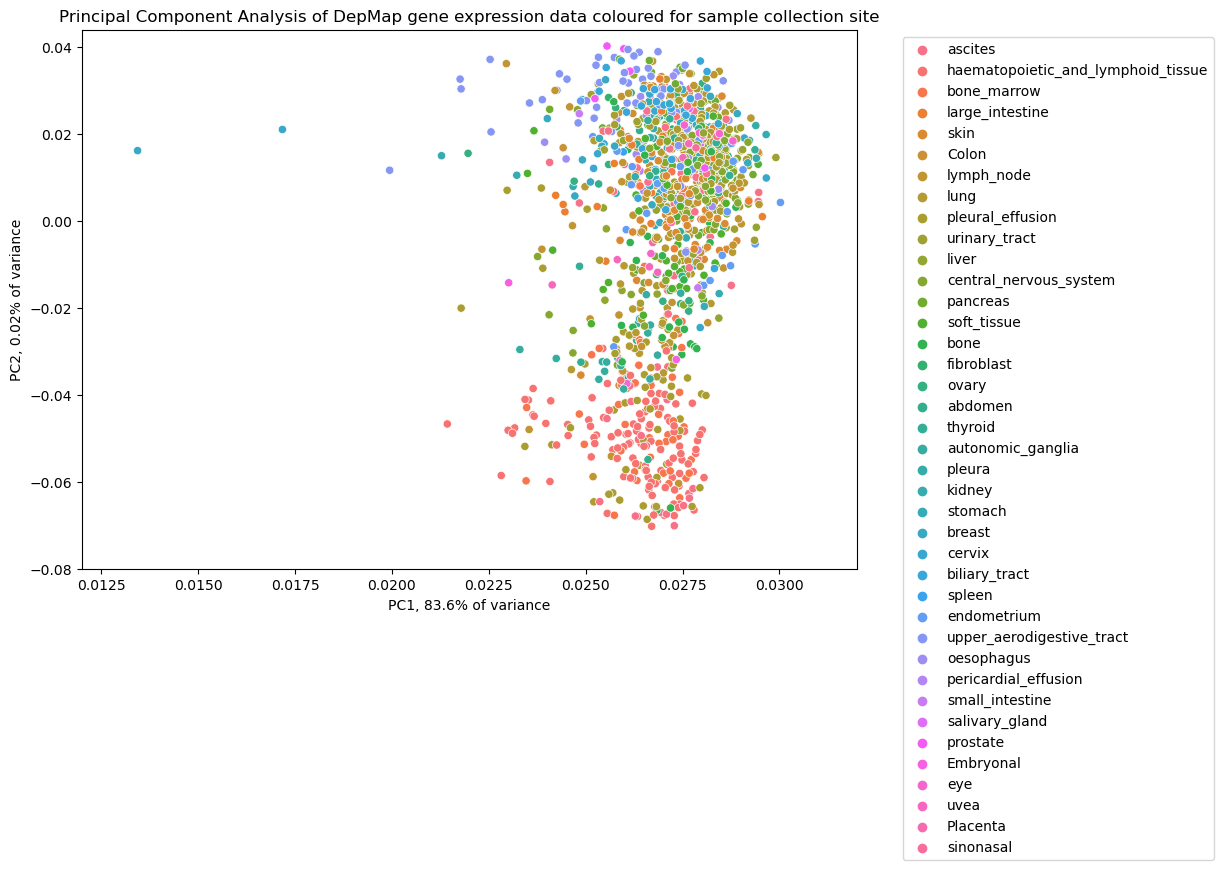

In [ ]:
##### Colour the expression data by sample collection site#####
unique_scs = matched_attributes['sample_collection_site']
joinable_exp["sample_collection_site"] = unique_scs
print(type(pca_joinexp))
print(pca_joinexp.explained_variance_ratio_)

plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue = joinable_exp.sample_collection_site)

plt.title('Principal Component Analysis of DepMap gene expression data coloured for sample collection site')
plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 


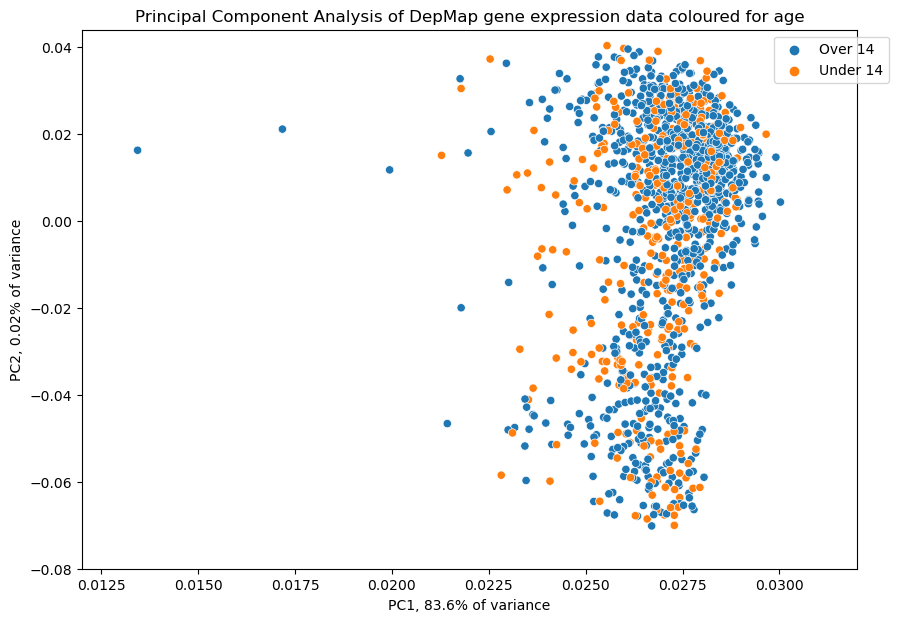

In [ ]:
##### Colour the expression data by sample collection site#####
#### Code each of the variables I am interested in
unique_age = matched_attributes['age']
joinable_exp["age"] = unique_age

joinable_exp['age'] = np.where(joinable_exp['age'] == "Pediatric", 1, joinable_exp['age'])
joinable_exp['age'] = np.where(joinable_exp['age'] == "Fetus", 1, joinable_exp['age'])
joinable_exp['age'] = np.where(joinable_exp['age'] == "Adult", 50, joinable_exp['age'])
joinable_exp['age'] = joinable_exp['age'].astype('float')
joinable_exp['age'] = np.where(joinable_exp['age'] >14, "Over 14", "Under 14")


#joinable_exp.loc[joinable_exp['age'] > 14, 'age'] = 'Over 14'
#joinable_nona = joinable_exp.dropna(subset=['age'])
#joinable_nona['age'] = joinable_nona['age'].astype('int')
#print(joinable_nona['age'])
#joinable_nona['age'] = np.where(joinable_nona['age'] >14, "Over 14", joinable_nona['age'])


plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue = joinable_exp.age)

plt.title('Principal Component Analysis of DepMap gene expression data coloured for age')
plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 

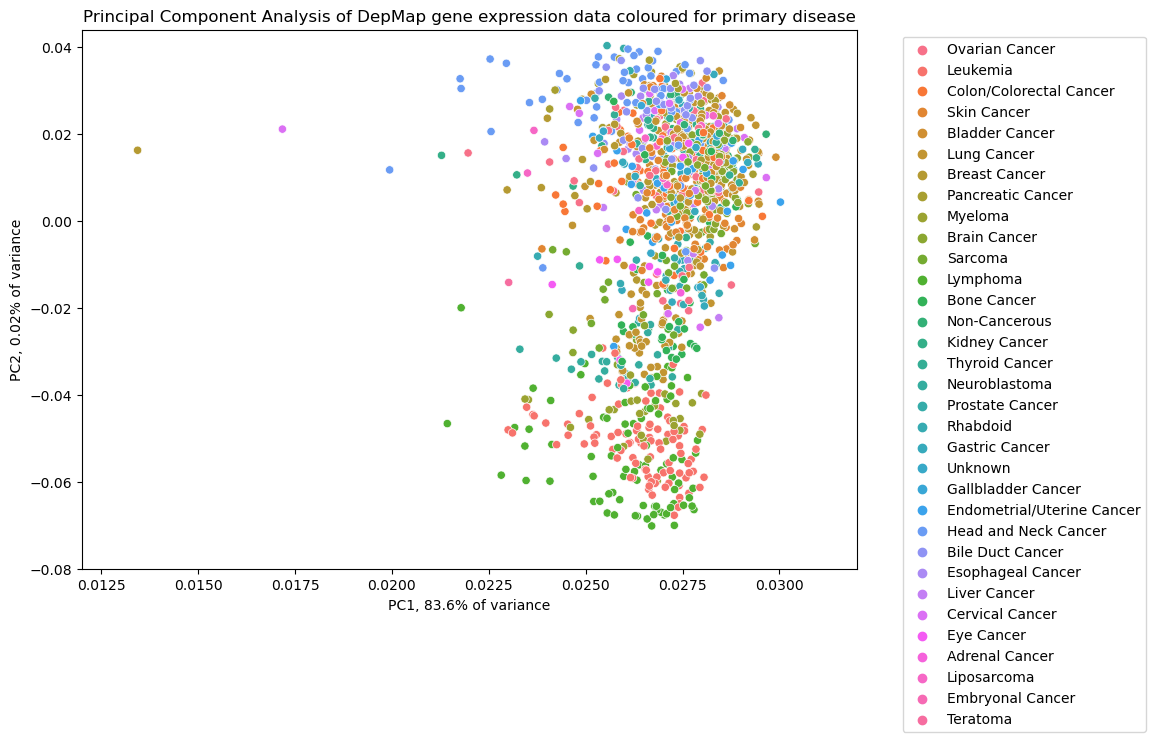

In [ ]:
##### Colour the expression data by sample collection site#####
unique_pd = matched_attributes['primary_disease']
joinable_exp["primary_disease"] = unique_pd

plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue = joinable_exp.primary_disease)

plt.title('Principal Component Analysis of DepMap gene expression data coloured for primary disease')
plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 



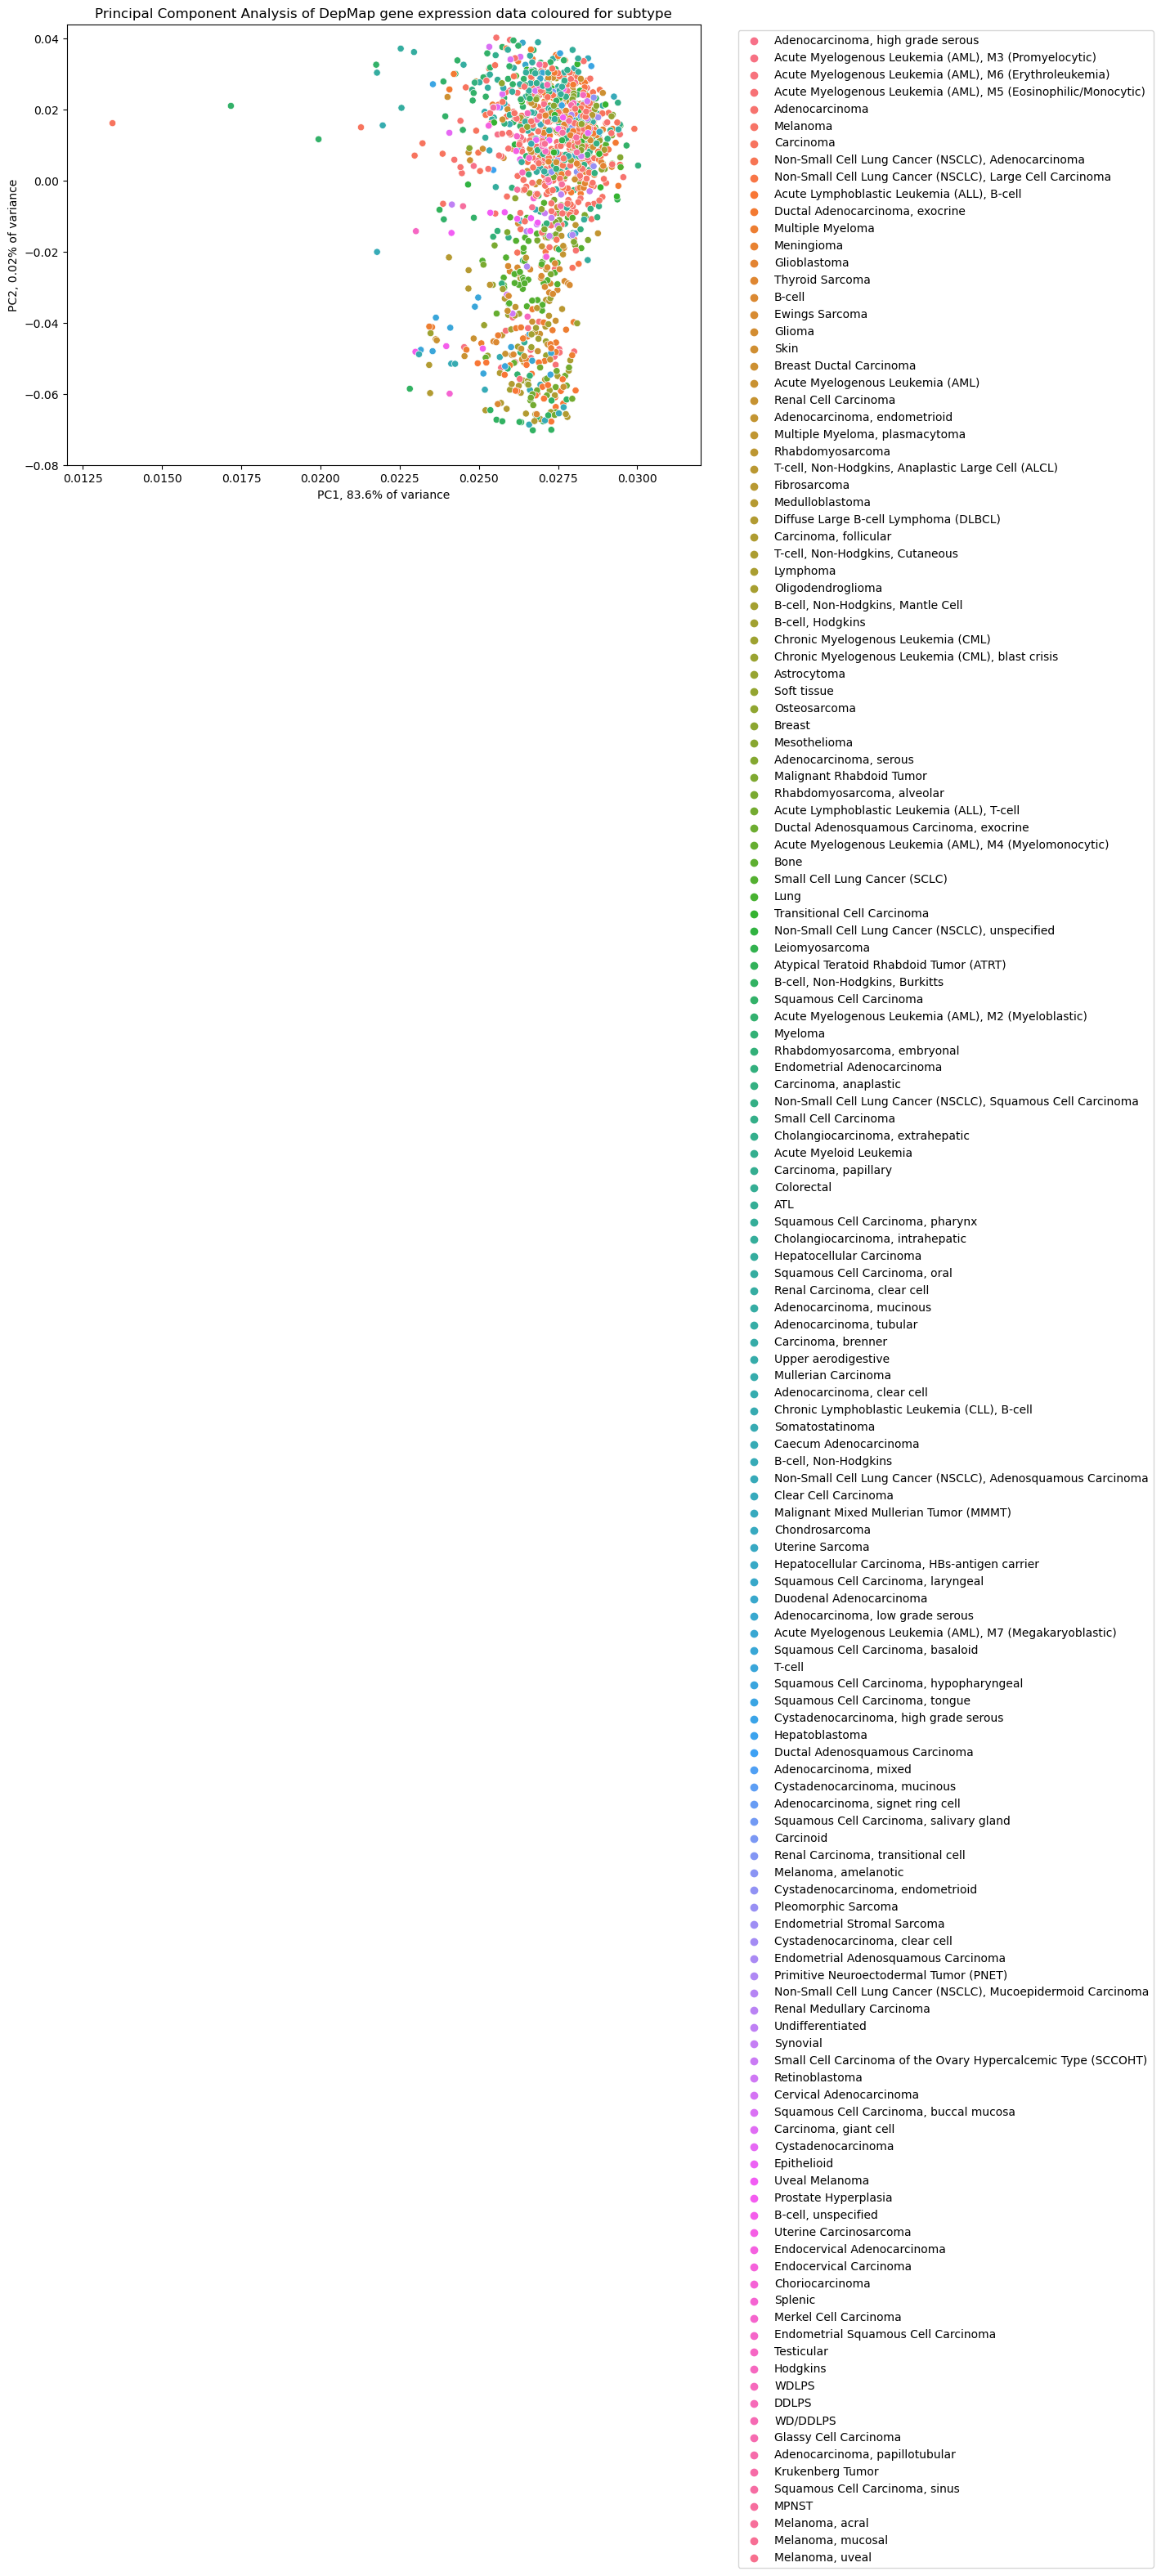

In [ ]:


##### Colour the expression data by sample collection site#####
unique_sub = matched_attributes['Subtype']
joinable_exp["Subtype"] = unique_sub


plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue = joinable_exp.Subtype)

plt.title('Principal Component Analysis of DepMap gene expression data coloured for subtype')
plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 



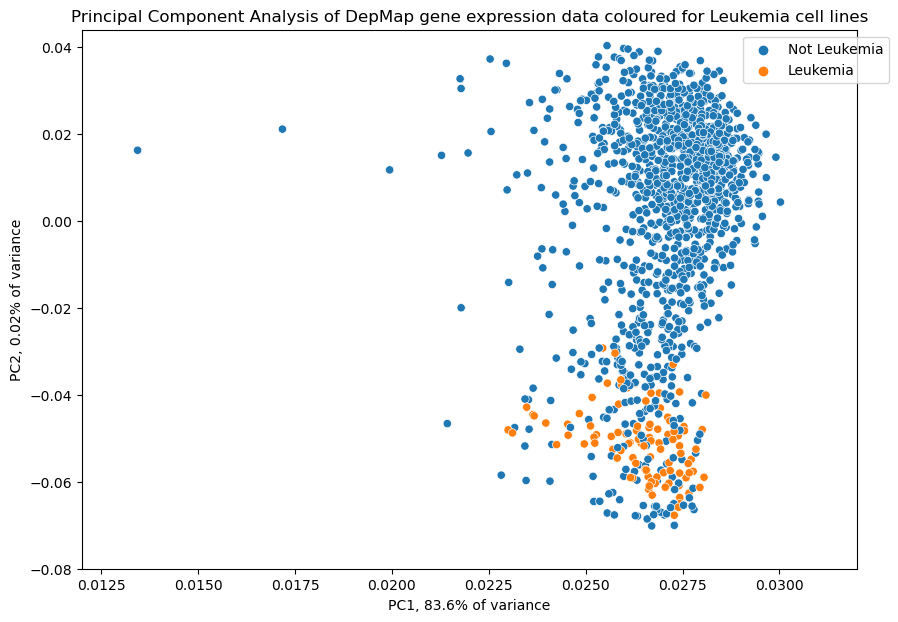

In [ ]:


leukemia = matched_attributes['primary_disease']
joinable_exp["leukemia"] = leukemia

joinable_exp['leukemia'] = np.where(joinable_exp['leukemia'] != "Leukemia", "Not Leukemia", joinable_exp['leukemia'])

plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_joinexp.components_[0,:], y=pca_joinexp.components_[1,:], hue = joinable_exp['leukemia'])

plt.title('Principal Component Analysis of DepMap gene expression data coloured for Leukemia cell lines')
plt.xlabel('PC1, 83.6% of variance')
plt.ylabel('PC2, 0.02% of variance')
plt.ylim(-0.08, 0.044)
plt.xlim(0.012, 0.032)
plt.legend(bbox_to_anchor=(1.05,1), loc='best')
plt.show() 

